Pregunta 2 - Hineill David Céspedes Espinoza

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

Diseño de filtros digitales

Se desea diseñar filtros pasabajos para aplicaciones de radar. Considere que contamos con un
sistema de recepción de señales de radar basado en un dispositivo SDR (Software Defined Radio)
que adquiere datos con una velocidad de muestreo de 100 MHz. La señal digitalizada pasa por
un demodulador para llevar la señal a banda base, por un filtro pasabajos y por un decimador
para reducir la tasa de muestreo a 1 MHz. Por ende, la frecuencia de corte del filtro a diseñar
también debe ser de 1 MHz

1. _ Se desea realizar el diseño aplicando la técnica de enventanado, utilizando una ventana
de tipo Kaiser (revisar Cap. 10 de Manolakis & Ingle, 2011). Para ello considere que la
atenuación en la banda de rechazo es de 60 dB. Además, seleccione la longitud del filtro
tal que la banda de transición sea como máximo el 10% de la frecuencia de muestreo luego
de la decimación.

In [2]:
import numpy as np
from scipy import signal
# --- Parámetros básicos del filtro ---
sampling_frequency = 100e6  # Frecuencia de muestreo en Hz (100 MHz)
nyquist_frequency = sampling_frequency / 2  # Frecuencia de Nyquist (50 MHz)
cutoff_frequency = 1e6  # Frecuencia de corte en Hz (1 MHz)
transition_bandwidth = 0.08 * cutoff_frequency  # Banda de transición (80 kHz)
stopband_attenuation = 60  # Atenuación deseada en la banda de rechazo (60 dB)
# --- Cálculo de parámetros para la ventana Kaiser ---
attenuation_in_db = stopband_attenuation  # Guardar la atenuación deseada en dB
normalized_transition_bandwidth = (transition_bandwidth * np.pi) / nyquist_frequency  # Ancho de la banda en radianes
# Calcular el parámetro beta de la ventana Kaiser basado en la atenuación
kaiser_beta = signal.kaiser_beta(attenuation_in_db)
# --- Calcular el orden del filtro ---
# Fórmula del orden del filtro FIR utilizando la aproximación de Kaiser
filter_order = int((attenuation_in_db - 8) / (2.285 * normalized_transition_bandwidth))
# Ajustar el orden para que sea impar (necesario para un filtro FIR simétrico)
if filter_order % 2 == 0:
    filter_order += 1
# --- Diseño del filtro FIR utilizando la ventana Kaiser ---
# Generar los coeficientes del filtro con la función firwin
fir_coefficients = signal.firwin(
    filter_order,  # Orden del filtro calculado
    cutoff_frequency / nyquist_frequency,  # Frecuencia de corte normalizada
    window=('kaiser', kaiser_beta),  # Usar la ventana Kaiser con el parámetro beta
    pass_zero=True  # Especifica que es un filtro pasa-bajas
)
# --- Calcular la respuesta en frecuencia del filtro ---
# freqz calcula las frecuencias y las magnitudes de la respuesta del filtro
frequencies, frequency_response = signal.freqz(
    fir_coefficients,  # Coeficientes del filtro
    worN=8000  # Número de puntos en el eje de frecuencia para mayor resolución
)
print("--------------Parámetros de la ventana Kaiser---------------")
print(f"La longitud del filtro FIR es de {filter_order}")
print(f"El valor del Betha del filtro FIR es de {kaiser_beta}")
print(f"Ya que usamos funciones determinadas de la librería de SCIPY , solo fue necesario calcular \nbetha usando la funcion  signal.kaiser_beta(attenuation_in_db) y calcular la longitud del filtro FIR ")
print("Estos valores eran necesarios como argumentos de la función que calcula los coeficientes")
frequencies_hz = frequencies * nyquist_frequency / np.pi  # Convertir a Hz
magnitude_response = 20 * np.log10(np.abs(frequency_response))  # Magnitud en dB
phase_response = np.angle(frequency_response)  # Fase en radianes

--------------Parámetros de la ventana Kaiser---------------
La longitud del filtro FIR es de 4527
El valor del Betha del filtro FIR es de 5.65326
Ya que usamos funciones determinadas de la librería de SCIPY , solo fue necesario calcular 
betha usando la funcion  signal.kaiser_beta(attenuation_in_db) y calcular la longitud del filtro FIR 
Estos valores eran necesarios como argumentos de la función que calcula los coeficientes


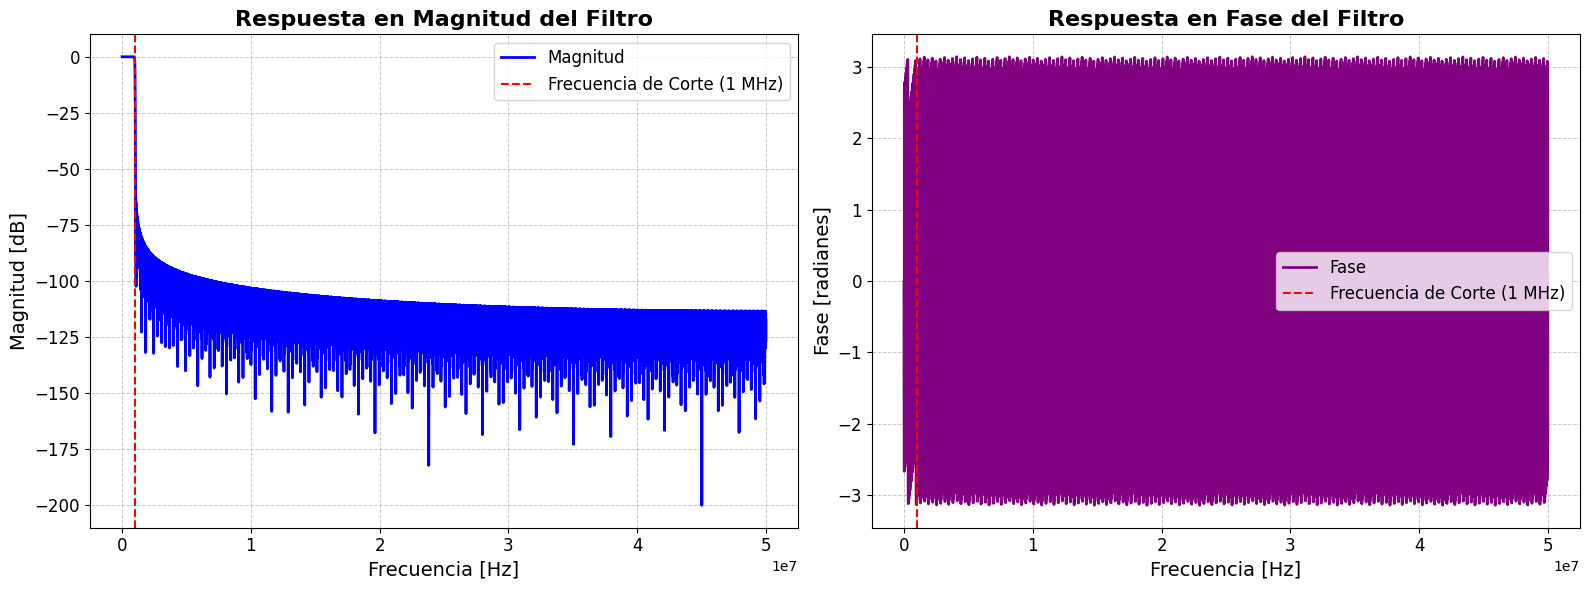

In [3]:
def plotear_magnitud_fase(magnitud ,  fase , frecuencias , title_magnitud, title_fase , frecuencia_corte):
    plt.figure(figsize=(16, 6))  # Tamaño de la figura
    # Gráfico de Magnitud
    plt.subplot(1, 2, 1)  # Primera gráfica (1 fila, 2 columnas, posición 1)
    plt.plot(frecuencias, magnitud, color='blue', linewidth=2, label='Magnitud')
    if frecuencia_corte != 0 :
        plt.axvline(frecuencia_corte, color='red', linestyle='--', linewidth=1.5, label='Frecuencia de Corte (1 MHz)')
    plt.title(title_magnitud, fontsize=16, fontweight='bold')
    plt.xlabel("Frecuencia [Hz]", fontsize=14)
    plt.ylabel("Magnitud [dB]", fontsize=14)
    plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # Gráfico de Fase
    plt.subplot(1, 2, 2)  # Segunda gráfica (1 fila, 2 columnas, posición 2)
    plt.plot(frecuencias, fase, color='purple', linewidth=2, label='Fase')
    if frecuencia_corte != 0 :
        plt.axvline(frecuencia_corte, color='red', linestyle='--', linewidth=1.5, label='Frecuencia de Corte (1 MHz)')
    plt.title(title_fase, fontsize=16, fontweight='bold')
    plt.xlabel("Frecuencia [Hz]", fontsize=14)
    plt.ylabel("Fase [radianes]", fontsize=14)
    plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # Ajuste del diseño general
    plt.tight_layout()
    plt.show()
plotear_magnitud_fase(magnitude_response ,phase_response ,frequencies_hz,  "Respuesta en Magnitud del Filtro", "Respuesta en Fase del Filtro" ,cutoff_frequency  )

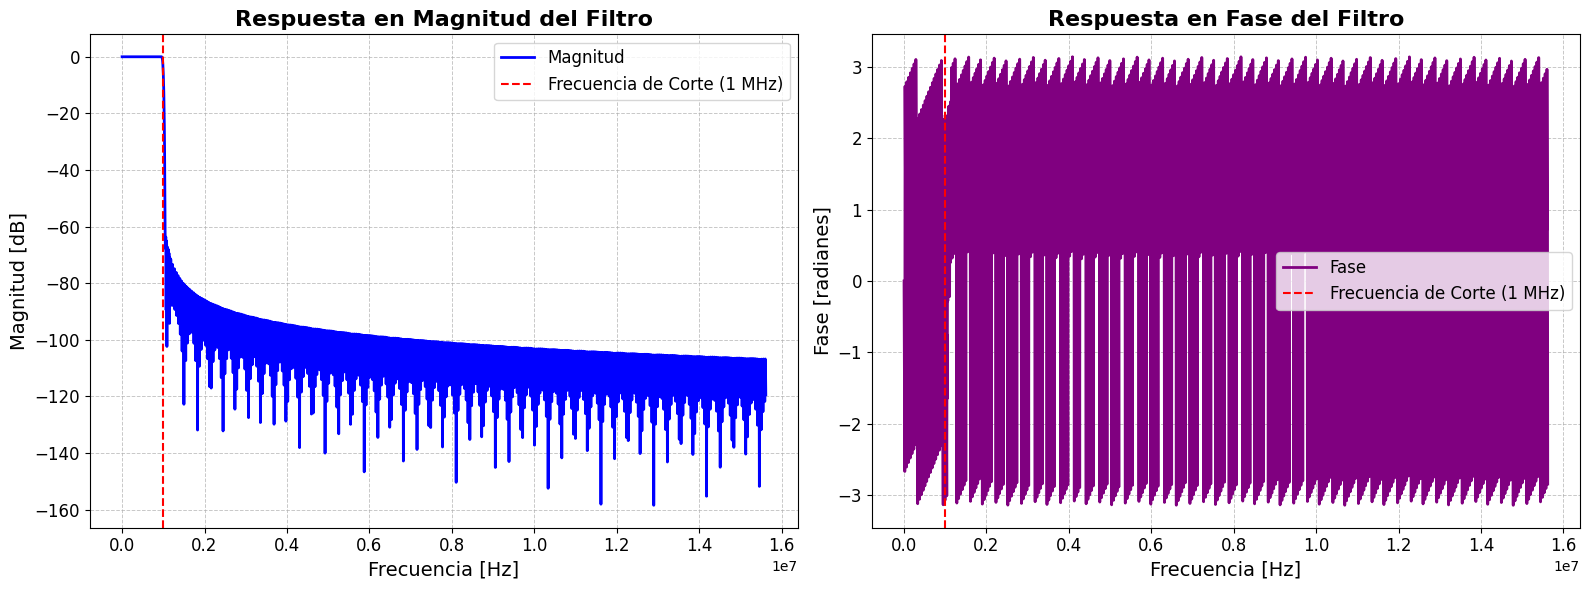

In [4]:
#Ajustamos para q se vean mejor las gráficas 
plotear_magnitud_fase(magnitude_response[0:2500] ,phase_response[0:2500] ,frequencies_hz[0:2500],  "Respuesta en Magnitud del Filtro", "Respuesta en Fase del Filtro" ,cutoff_frequency  )

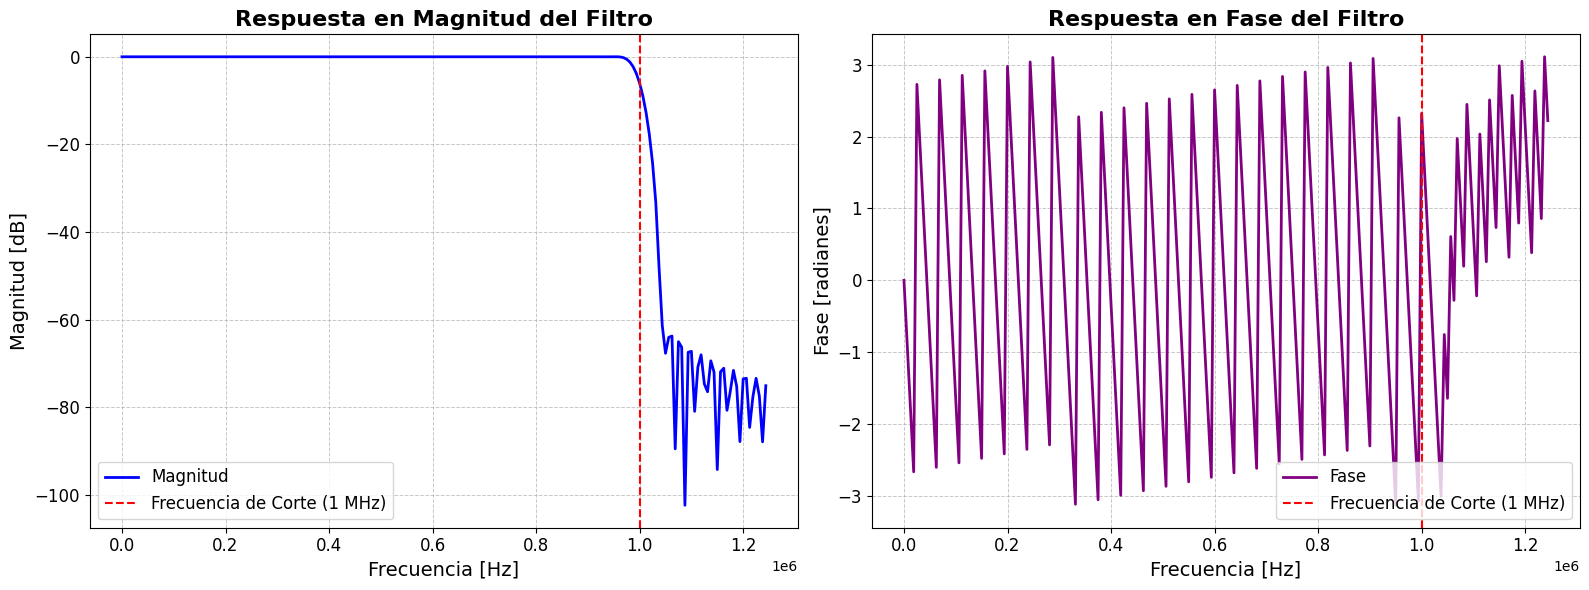

In [5]:
plotear_magnitud_fase(magnitude_response[0:200] ,phase_response[0:200] ,frequencies_hz[0:200],  "Respuesta en Magnitud del Filtro", "Respuesta en Fase del Filtro" ,cutoff_frequency  )

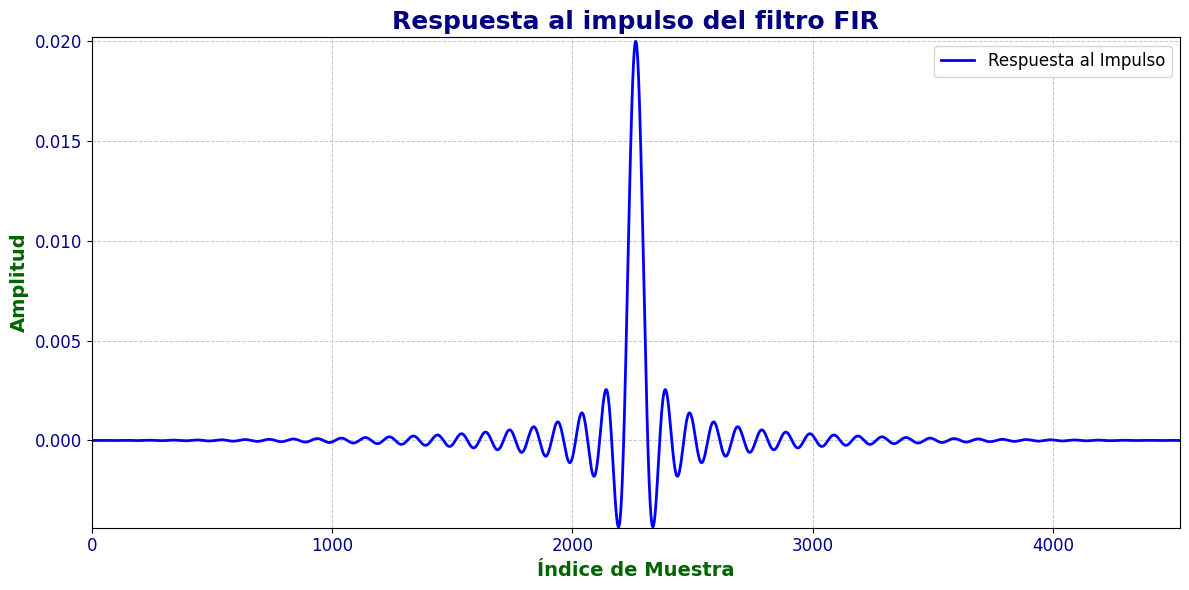

In [6]:
#GRAFICAR AS
def graficar_respuesta_impulso(coe, title):
    plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
    # Gráfico con plt.plot
    plt.plot(
        coe, 
        color='blue', 
        linewidth=2, 
        label='Respuesta al Impulso'
    )
    # Personalización del gráfico
    plt.title(title, fontsize=18, fontweight='bold', color='navy')
    plt.xlabel("Índice de Muestra", fontsize=14, fontweight='bold', color='darkgreen')
    plt.ylabel("Amplitud", fontsize=14, fontweight='bold', color='darkgreen')
    plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)  # Cuadrícula personalizada
    plt.ylim([np.min(fir_coefficients) *1.01, np.max(fir_coefficients) *1.01])  # Ajustar límites en Y
    plt.xlim([0, len(fir_coefficients)])  # Ajustar límites en X
    plt.xticks(fontsize=12, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')

    # Añadir leyenda
    plt.legend(fontsize=12)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()
graficar_respuesta_impulso(fir_coefficients , "Respuesta al impulso del filtro FIR")

(0.0, 3000000.0)

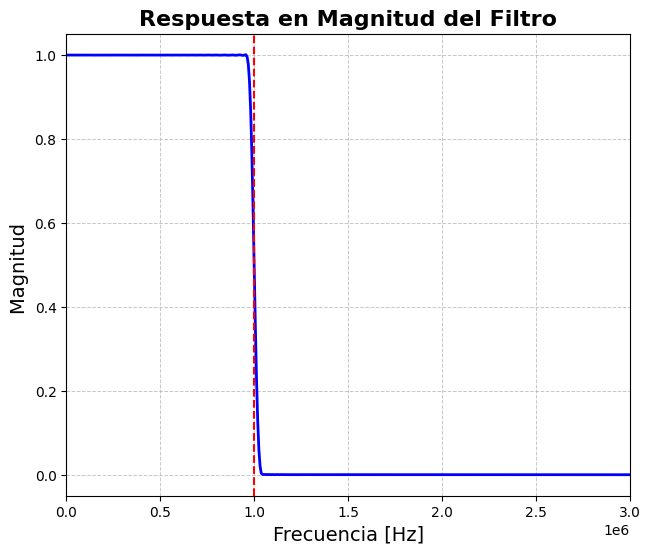

In [7]:
#Ajustamos para q se vean mejor las gráficas 
# --- Graficar la respuesta en frecuencia ---
plt.figure(figsize=(16, 6))  # Tamaño de la figura
# Gráfico de Magnitud
plt.subplot(1, 2, 1)  # Primera gráfica (1 fila, 2 columnas, posición 1)
plt.plot(frequencies_hz, np.abs(frequency_response), color='blue', linewidth=2, label='Magnitud')
plt.axvline(cutoff_frequency, color='red', linestyle='--', linewidth=1.5, label='Frecuencia de Corte (1 MHz)')
plt.title("Respuesta en Magnitud del Filtro", fontsize=16, fontweight='bold')
plt.xlabel("Frecuencia [Hz]", fontsize=14)
plt.ylabel("Magnitud ", fontsize=14)
plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xlim([ 0 ,0.3* 1e7])


In [8]:
rizado_banda_paso = np.max(np.abs(frequency_response[np.where(frequencies_hz <1e6)])) -np.min(np.abs(frequency_response[np.where(frequencies_hz <1e6)]))
rizado_banda_paso =  10*np.log10(rizado_banda_paso/2)
rizado_banda_rechazo = np.max(np.abs(frequency_response[np.where(frequencies_hz >1e6)])) -np.min(np.abs(frequency_response[np.where(frequencies_hz >1e6)]))
rizado_banda_rechazo =  10*np.log10(rizado_banda_rechazo)

173
157


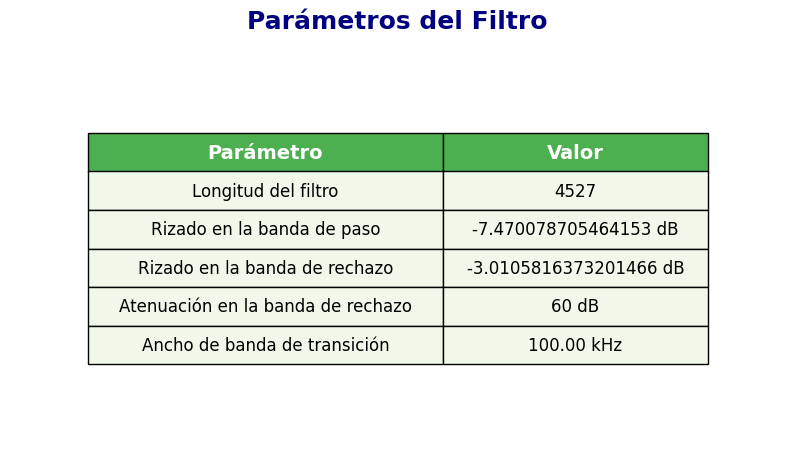

In [9]:
# Parámetros simulados
import matplotlib.pyplot as plt
import numpy as np
def calculo_frecuencia_criterio_3db(espectro_db, freq):
    max_value = np.max(espectro_db)
    nivel_3db = max_value-1
    fake_idx = np.argmin(np.abs(np.flip(espectro_db)-nivel_3db)) #Invertimos el arreglo para hallar el indice de la frecuencia de corte de la derecha
    valor_a_3_db = np.flip(espectro_db)[fake_idx]
    indice = np.where(valor_a_3_db == espectro_db )
    return freq[indice][0]


def calculo_frecuencia_criterio_60db(espectro_db, freq): #Calcula frecuencia para la que empieza la banda de rechazo
    max_value = np.max(espectro_db)
    nivel_3db = max_value-66.75
    fake_idx = np.argmin(np.abs(np.flip(espectro_db)-nivel_3db)) #Invertimos el arreglo para hallar el indice de la frecuencia de corte de la derecha
    valor_a_3_db = np.flip(espectro_db)[fake_idx]
    indice = np.where(valor_a_3_db == espectro_db )
    return freq[indice][0]

anchoDeBanda =  calculo_frecuencia_criterio_3db(magnitude_response , frequencies_hz)
print(int( np.where(frequencies_hz ==calculo_frecuencia_criterio_60db(magnitude_response, frequencies_hz) )[0]  ))
print(int(np.where(frequencies_hz ==anchoDeBanda)[0]))
#Ahora calculamos el rizado tomando en cuenta solo las componentes hasta llegar a la frecuencia que marca el ancho de banda 
def calcular_rizado(arreglo_db):
    return np.max(arreglo_db) - np.min(arreglo_db)
ancho_banda_transicion =  calculo_frecuencia_criterio_60db(magnitude_response, frequencies_hz) - anchoDeBanda
rizado_bp = 0.05  # Rizado en la banda de paso (en dB)
delta_s = 10**(-60 /20)
A = 60

# Datos para la tabla
column_labels = ["Parámetro", "Valor"]
table_data = [
    ["Longitud del filtro", f"{filter_order}"],
    ["Rizado en la banda de paso", f"{rizado_banda_paso} dB"],
    ["Rizado en la banda de rechazo", f"{rizado_banda_rechazo} dB" ],
    ["Atenuación en la banda de rechazo", f"{A} dB"],
    ["Ancho de banda de transición", f"{ancho_banda_transicion/1e3:.2f} kHz"]
]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')  # Ocultar ejes

# Dibujar la tabla
table = ax.table(
    cellText=table_data, 
    colLabels=column_labels, 
    loc='center', 
    cellLoc='center', 
    colLoc='center',
    bbox=[0.1, 0.2, 0.8, 0.6]  # Posición [izq, abajo, ancho, alto]
)

# Personalizar colores y bordes
table.auto_set_font_size(False)
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(column_labels))))  # Ajustar ancho automáticamente

# Personalizar encabezados
for key, cell in table.get_celld().items():
    if key[0] == 0:  # Encabezados (fila 0)
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4CAF50')  # Verde oscuro elegante
        cell.set_edgecolor('black')
    else:  # Celdas normales
        cell.set_fontsize(12)
        cell.set_facecolor('#F1F8E9')  # Verde claro para celdas
        cell.set_edgecolor('black')
# Añadir título
plt.title("Parámetros del Filtro", fontsize=18, fontweight='bold', color='navy', pad=20)
# Mostrar la tabla
plt.show()

2._ Usar Tecnica CIC

In [10]:
#En este caso la frecuencia de muestreo con el que llega la señal al filtros es de 10 MHz

sampling_frequency = 10e6  # Frecuencia de muestreo en Hz (100 MHz)
nyquist_frequency = sampling_frequency / 2  # Frecuencia de Nyquist (50 MHz)
cutoff_frequency = 1e6  # Frecuencia de corte en Hz (1 MHz)
transition_bandwidth = 0.08 * cutoff_frequency  # Banda de transición (80 kHz)
stopband_attenuation = 60  # Atenuación deseada en la banda de rechazo (60 dB)
# --- Cálculo de parámetros para la ventana Kaiser ---
attenuation_in_db = stopband_attenuation  # Guardar la atenuación deseada en dB
normalized_transition_bandwidth = (transition_bandwidth * np.pi) / nyquist_frequency  # Ancho de la banda en radianes
# Calcular el parámetro beta de la ventana Kaiser basado en la atenuación
kaiser_beta = signal.kaiser_beta(attenuation_in_db)
# --- Calcular el orden del filtro ---
# Fórmula del orden del filtro FIR utilizando la aproximación de Kaiser
filter_order = int((attenuation_in_db - 8) / (2.285 * normalized_transition_bandwidth))
# Ajustar el orden para que sea impar (necesario para un filtro FIR simétrico)
if filter_order % 2 == 0:
    filter_order += 1
# --- Diseño del filtro FIR utilizando la ventana Kaiser ---
# Generar los coeficientes del filtro con la función firwin
fir_coefficients = signal.firwin(
    filter_order,  # Orden del filtro calculado
    cutoff_frequency / nyquist_frequency,  # Frecuencia de corte normalizada
    window=('kaiser', kaiser_beta),  # Usar la ventana Kaiser con el parámetro beta
    pass_zero=True  # Especifica que es un filtro pasa-bajas
)
# --- Calcular la respuesta en frecuencia del filtro ---
# freqz calcula las frecuencias y las magnitudes de la respuesta del filtro
frequencies, frequency_response = signal.freqz(
    fir_coefficients,  # Coeficientes del filtro
    worN=8000  # Número de puntos en el eje de frecuencia para mayor resolución
)
frequencies_hz = frequencies * nyquist_frequency / np.pi  # Convertir a Hz
magnitude_response = 20 * np.log10(np.abs(frequency_response))  # Magnitud en dB
phase_response = np.angle(frequency_response)  # Fase en radianes

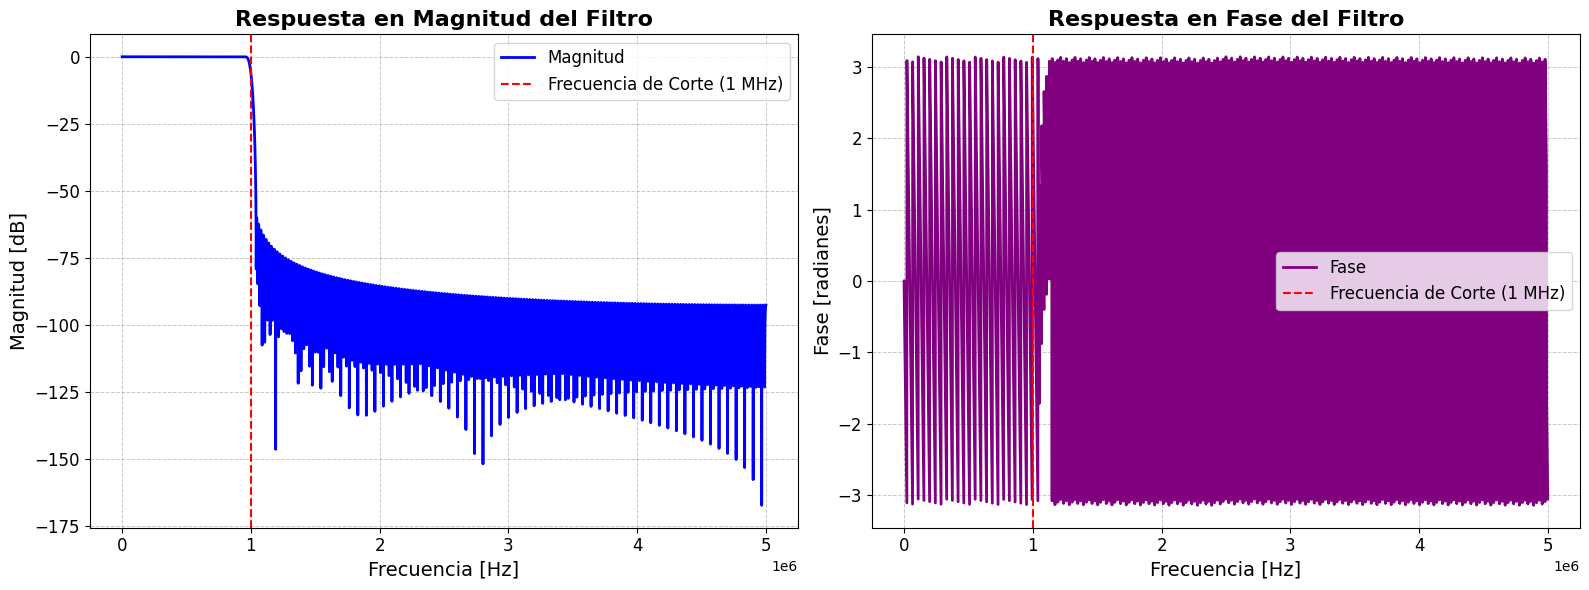

In [11]:
plotear_magnitud_fase(magnitude_response ,phase_response ,frequencies_hz,  "Respuesta en Magnitud del Filtro", "Respuesta en Fase del Filtro" ,cutoff_frequency  )

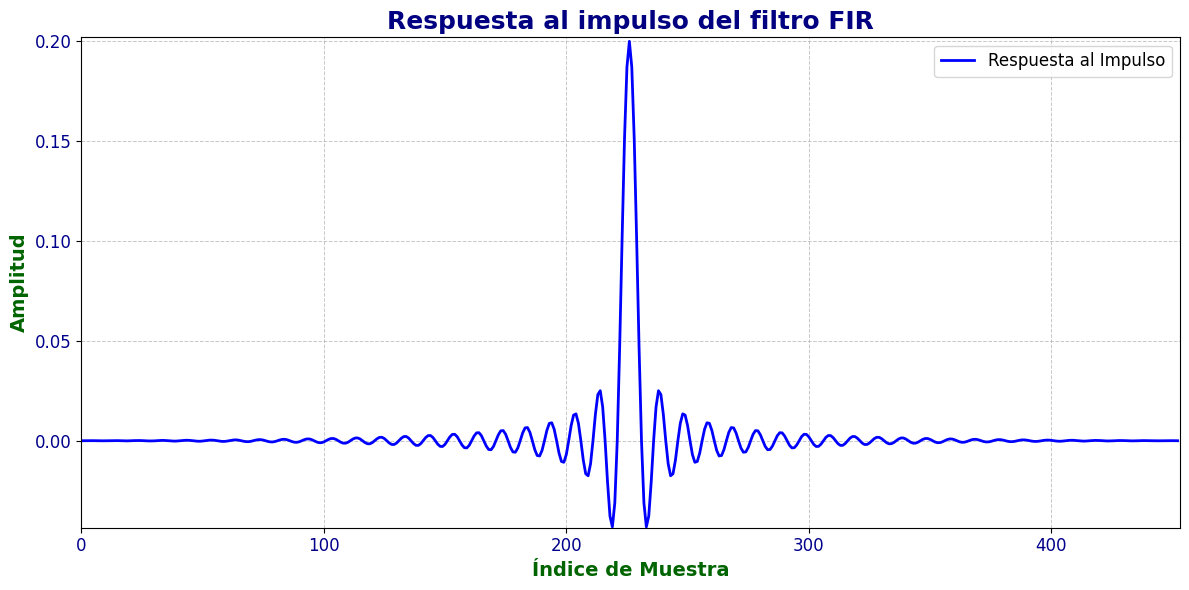

In [12]:
graficar_respuesta_impulso(fir_coefficients , "Respuesta al impulso del filtro FIR")

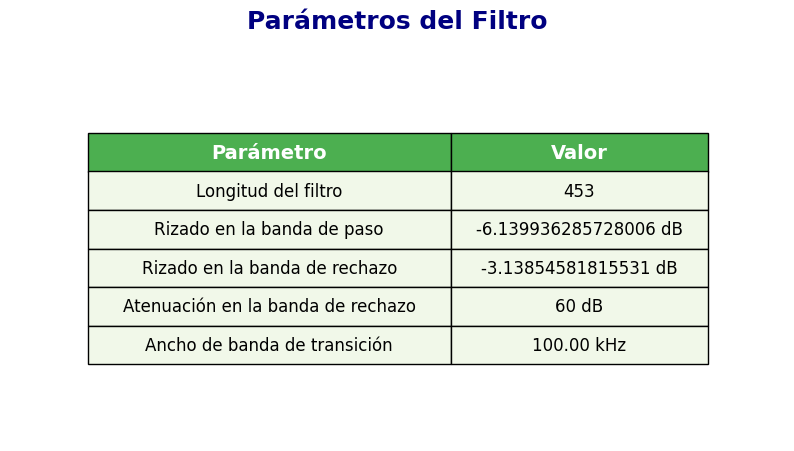

In [13]:
rizado_banda_paso = np.max(np.abs(frequency_response[np.where(frequencies_hz <1e6)])) -np.min(np.abs(frequency_response[np.where(frequencies_hz <1e6)]))
rizado_banda_paso =  10*np.log10(rizado_banda_paso/2)
rizado_banda_rechazo = np.max(np.abs(frequency_response[np.where(frequencies_hz >1e6)])) -np.min(np.abs(frequency_response[np.where(frequencies_hz >1e6)]))
rizado_banda_rechazo =  10*np.log10(rizado_banda_rechazo)
# Datos para la tabla
column_labels = ["Parámetro", "Valor"]
table_data = [
    ["Longitud del filtro", f"{filter_order}"],
    ["Rizado en la banda de paso", f"{rizado_banda_paso} dB"],
    ["Rizado en la banda de rechazo", f"{rizado_banda_rechazo} dB" ],
    ["Atenuación en la banda de rechazo", f"{A} dB"],
    ["Ancho de banda de transición", f"{ancho_banda_transicion/1e3:.2f} kHz"]
]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')  # Ocultar ejes

# Dibujar la tabla
table = ax.table(
    cellText=table_data, 
    colLabels=column_labels, 
    loc='center', 
    cellLoc='center', 
    colLoc='center',
    bbox=[0.1, 0.2, 0.8, 0.6]  # Posición [izq, abajo, ancho, alto]
)

# Personalizar colores y bordes
table.auto_set_font_size(False)
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(column_labels))))  # Ajustar ancho automáticamente

# Personalizar encabezados
for key, cell in table.get_celld().items():
    if key[0] == 0:  # Encabezados (fila 0)
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4CAF50')  # Verde oscuro elegante
        cell.set_edgecolor('black')
    else:  # Celdas normales
        cell.set_fontsize(12)
        cell.set_facecolor('#F1F8E9')  # Verde claro para celdas
        cell.set_edgecolor('black')
# Añadir título
plt.title("Parámetros del Filtro", fontsize=18, fontweight='bold', color='navy', pad=20)
# Mostrar la tabla
plt.show()

In [14]:

fs = 100e6  # Frecuencia de muestreo (100 MHz)
nyquist = fs / 2
#FRECUENCIAS
frequencies = np.linspace(0, nyquist, 4096)
omega_oficial = 2 * np.pi * frequencies / fs
frecuencia_CIC_2 = 2 * np.pi * frequencies / fs
H_CIC_2 =((1 - np.exp(-2j * frecuencia_CIC_2) + 0) / (1 - np.exp(-1j * frecuencia_CIC_2) + 0)) ** 2
frecuencia_CIC_5 = 2 * np.pi * frequencies / (fs/2)
H_CIC_5 = ((1 - np.exp(-5j * frecuencia_CIC_5) + 0) / (1 - np.exp(-1j * frecuencia_CIC_5) + 0)) ** 5


C:\Users\Hineill\AppData\Local\Temp\ipykernel_27268\530545481.py:7: RuntimeWarning: invalid value encountered in divide
  H_CIC_2 =((1 - np.exp(-2j * frecuencia_CIC_2) + 0) / (1 - np.exp(-1j * frecuencia_CIC_2) + 0)) ** 2
C:\Users\Hineill\AppData\Local\Temp\ipykernel_27268\530545481.py:9: RuntimeWarning: invalid value encountered in divide
  H_CIC_5 = ((1 - np.exp(-5j * frecuencia_CIC_5) + 0) / (1 - np.exp(-1j * frecuencia_CIC_5) + 0)) ** 5


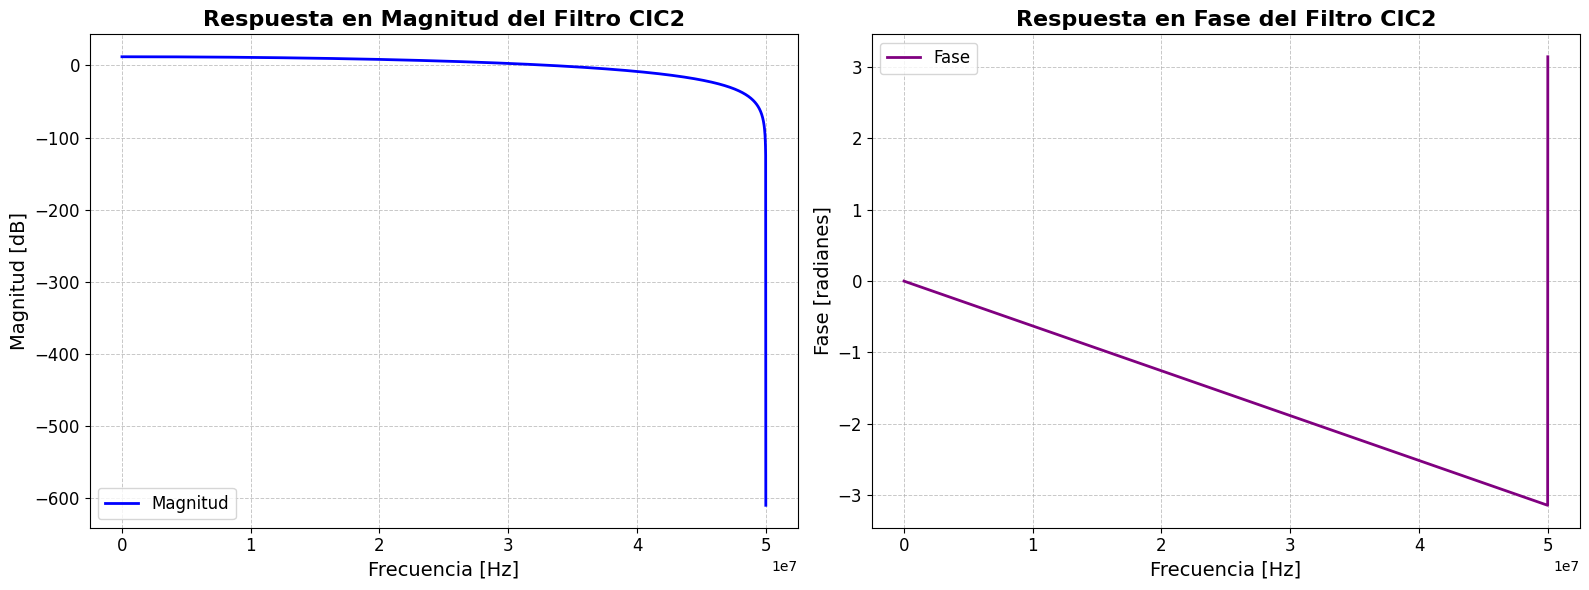

In [15]:
plotear_magnitud_fase(20 *np.log10(np.abs(H_CIC_2)) ,np.angle(H_CIC_2) ,frequencies,  "Respuesta en Magnitud del Filtro CIC2", "Respuesta en Fase del Filtro CIC2" ,0 )

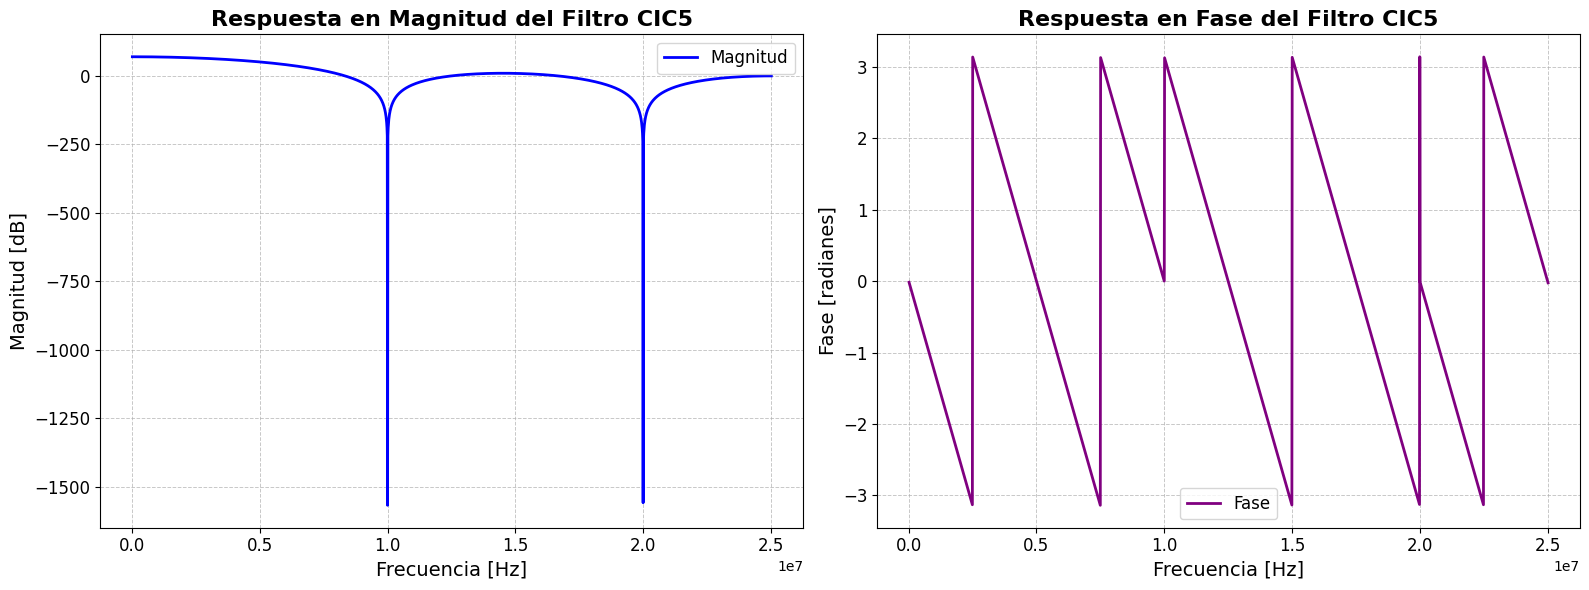

In [16]:
plotear_magnitud_fase(20 *np.log10(np.abs(H_CIC_5[0:2050])) ,np.angle(H_CIC_5[0:2050]) ,frequencies[0:2050],  "Respuesta en Magnitud del Filtro CIC5", "Respuesta en Fase del Filtro CIC5" ,0 )

In [17]:
#FIR
fs = 100e6
fs_lp=10e6
fc = 1e6
nyquist = fs/2
frequencies, frequency_response = signal.freqz(
    fir_coefficients,  # Coeficientes del filtro
    worN=8000  # Número de puntos en el eje de frecuencia para mayor resolución
)

nyquist = fs / 2
#FRECUENCIAS
frequencies = np.linspace(0, nyquist, 4096)
frecuencia_CIC_2 = 2 * np.pi * frequencies / fs
H_CIC_2 =((1 - np.exp(-2j * frecuencia_CIC_2) + 0) / (1 - np.exp(-1j * frecuencia_CIC_2) + 0)) ** 2
frecuencia_CIC_5 = 2 * np.pi * frequencies / (fs/2)
H_CIC_5 = ((1 - np.exp(-5j * frecuencia_CIC_5) + 0) / (1 - np.exp(-1j * frecuencia_CIC_5) + 0)) ** 5
print(len(frequency_response))


8000


C:\Users\Hineill\AppData\Local\Temp\ipykernel_27268\1767444904.py:15: RuntimeWarning: invalid value encountered in divide
  H_CIC_2 =((1 - np.exp(-2j * frecuencia_CIC_2) + 0) / (1 - np.exp(-1j * frecuencia_CIC_2) + 0)) ** 2
C:\Users\Hineill\AppData\Local\Temp\ipykernel_27268\1767444904.py:17: RuntimeWarning: invalid value encountered in divide
  H_CIC_5 = ((1 - np.exp(-5j * frecuencia_CIC_5) + 0) / (1 - np.exp(-1j * frecuencia_CIC_5) + 0)) ** 5


In [18]:
numReplicas =  10
replica = np.zeros(numReplicas * len(frequency_response), dtype =complex)
for i in range(numReplicas):
    start = i * len(frequency_response)
    end = (i + 1) * len(frequency_response)
    if i % 2 == 0:
        replica[start:end] = frequency_response
    else:
        replica[start:end] = frequency_response[::-1]  # Réplica espejada

frequencies = np.linspace(0, nyquist, len(replica))
frecuencia_CIC_2 = 2 * np.pi * frequencies / fs
H_CIC_2 =((1 - np.exp(-2j * frecuencia_CIC_2) + 0) / (1 - np.exp(-1j * frecuencia_CIC_2) + 0)) ** 2
frecuencia_CIC_5 = 2 * np.pi * frequencies / (fs/2)
H_CIC_5 = ((1 - np.exp(-5j * frecuencia_CIC_5) + 0) / (1 - np.exp(-1j * frecuencia_CIC_5) + 0)) ** 5
H_total = H_CIC_2 * H_CIC_5 * replica[0:len(H_CIC_2)]


C:\Users\Hineill\AppData\Local\Temp\ipykernel_27268\3489003025.py:13: RuntimeWarning: invalid value encountered in divide
  H_CIC_2 =((1 - np.exp(-2j * frecuencia_CIC_2) + 0) / (1 - np.exp(-1j * frecuencia_CIC_2) + 0)) ** 2
C:\Users\Hineill\AppData\Local\Temp\ipykernel_27268\3489003025.py:15: RuntimeWarning: invalid value encountered in divide
  H_CIC_5 = ((1 - np.exp(-5j * frecuencia_CIC_5) + 0) / (1 - np.exp(-1j * frecuencia_CIC_5) + 0)) ** 5


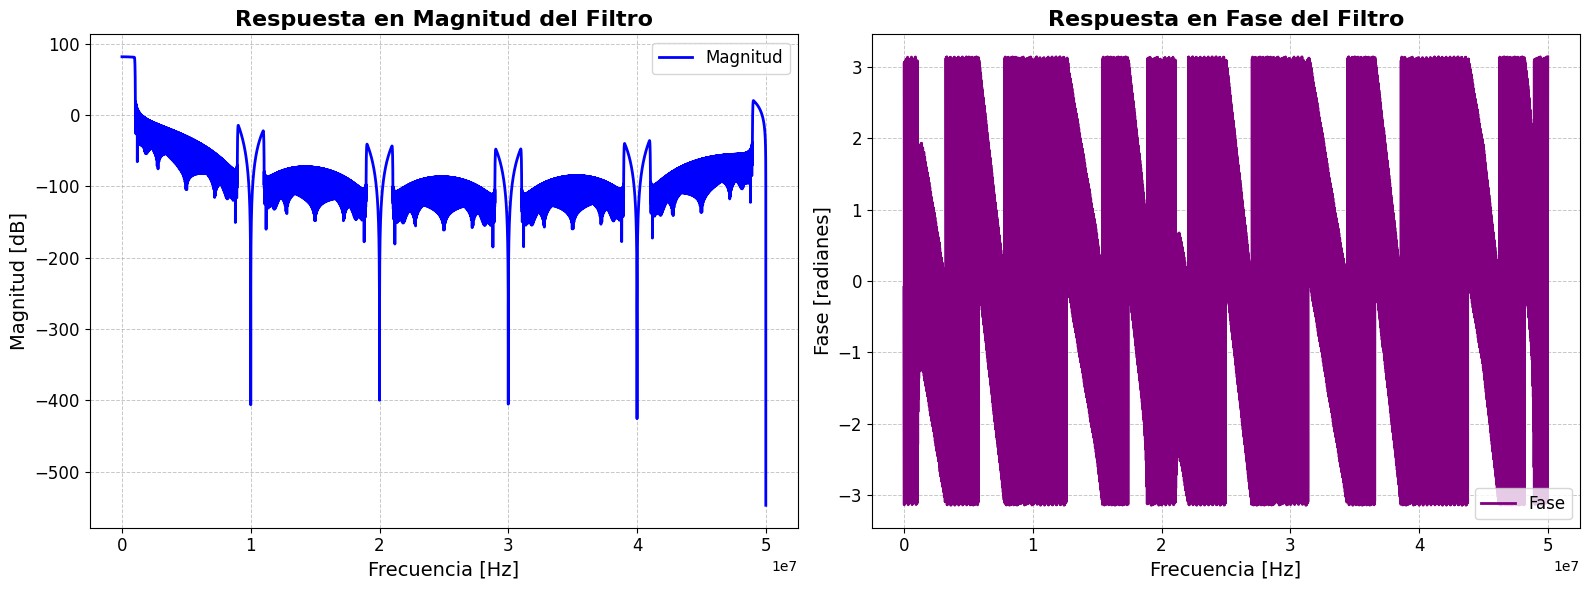

In [19]:
plotear_magnitud_fase(20*np.log10(np.abs(H_total)) , np.angle(H_total) ,frequencies ,  "Respuesta en Magnitud del Filtro", "Respuesta en Fase del Filtro" ,0  )

In [20]:
def plotear_magnitud_fase_cambio(magnitud ,  fase , frecuencias , title_magnitud, title_fase , frecuencia_corte):
    plt.figure(figsize=(16, 6))  # Tamaño de la figura
    # Gráfico de Magnitud
    plt.subplot(1, 2, 1)  # Primera gráfica (1 fila, 2 columnas, posición 1)
    plt.plot(frecuencias, magnitud, color='blue', linewidth=2, label='Magnitud')
    if frecuencia_corte != 0 :
        plt.axvline(frecuencia_corte, color='red', linestyle='--', linewidth=1.5, label='Frecuencia de Corte (1 MHz)')
    plt.title(title_magnitud, fontsize=16, fontweight='bold')
    plt.xlabel("Frecuencia [Hz]", fontsize=14)
    plt.ylabel("Magnitud [dB]", fontsize=14)
    plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim([0.8e6 , 1.25e6])
    # Gráfico de Fase
    plt.subplot(1, 2, 2)  # Segunda gráfica (1 fila, 2 columnas, posición 2)
    plt.plot(frecuencias, fase, color='purple', linewidth=2, label='Fase')
    if frecuencia_corte != 0 :
        plt.axvline(frecuencia_corte, color='red', linestyle='--', linewidth=1.5, label='Frecuencia de Corte (1 MHz)')
    plt.title(title_fase, fontsize=16, fontweight='bold')
    plt.xlabel("Frecuencia [Hz]", fontsize=14)
    plt.ylabel("Fase [radianes]", fontsize=14)
    plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim([0.8e6 , 1.25e6])
    # Ajuste del diseño general
    plt.tight_layout()
    plt.show()

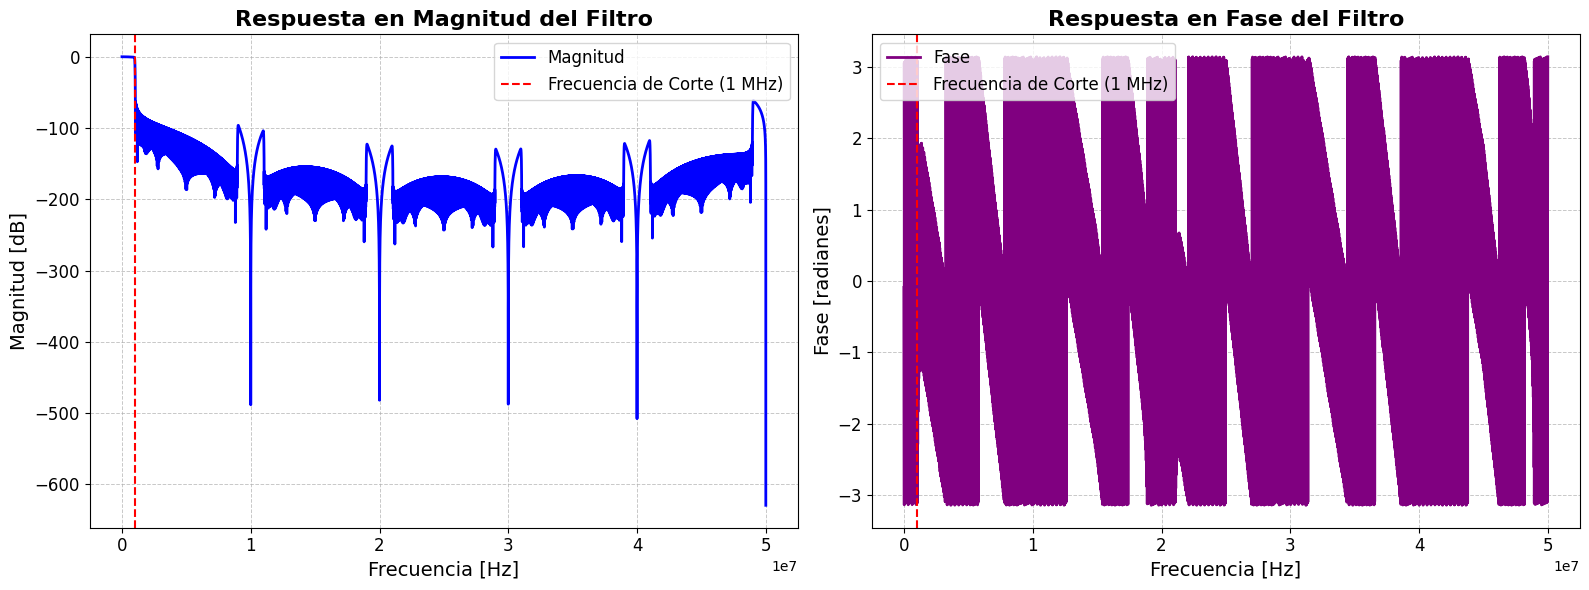

In [21]:
#Corrección de la ganancia 
H_total = H_total[~np.isnan(H_total)]
H_total_fixed =  H_total / np.max(np.abs(H_total))
plotear_magnitud_fase(20*np.log10(np.abs(H_total_fixed)) , np.angle(H_total_fixed) ,frequencies[0:len(H_total_fixed)] ,  "Respuesta en Magnitud del Filtro", "Respuesta en Fase del Filtro" ,1e6  )

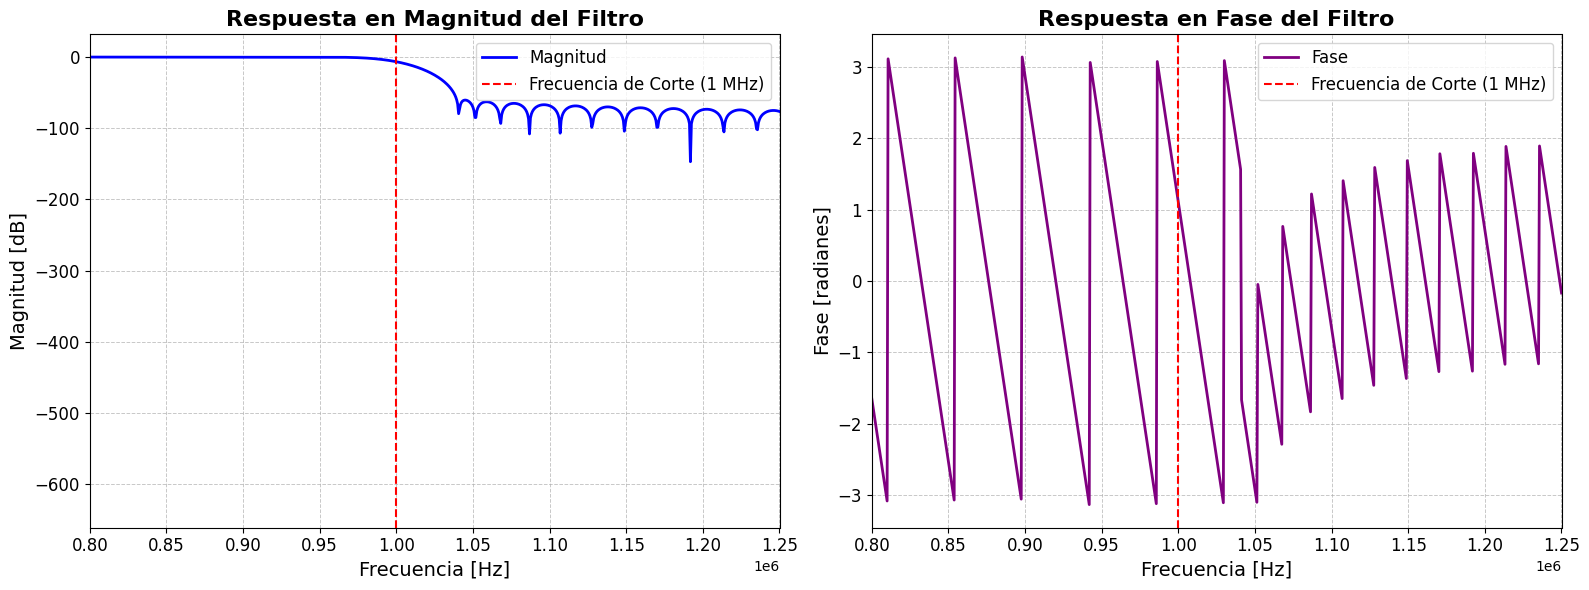

In [22]:
plotear_magnitud_fase_cambio(20*np.log10(np.abs(H_total_fixed)) , np.angle(H_total_fixed) ,frequencies[0:len(H_total_fixed)] ,  "Respuesta en Magnitud del Filtro", "Respuesta en Fase del Filtro" ,1e6  )

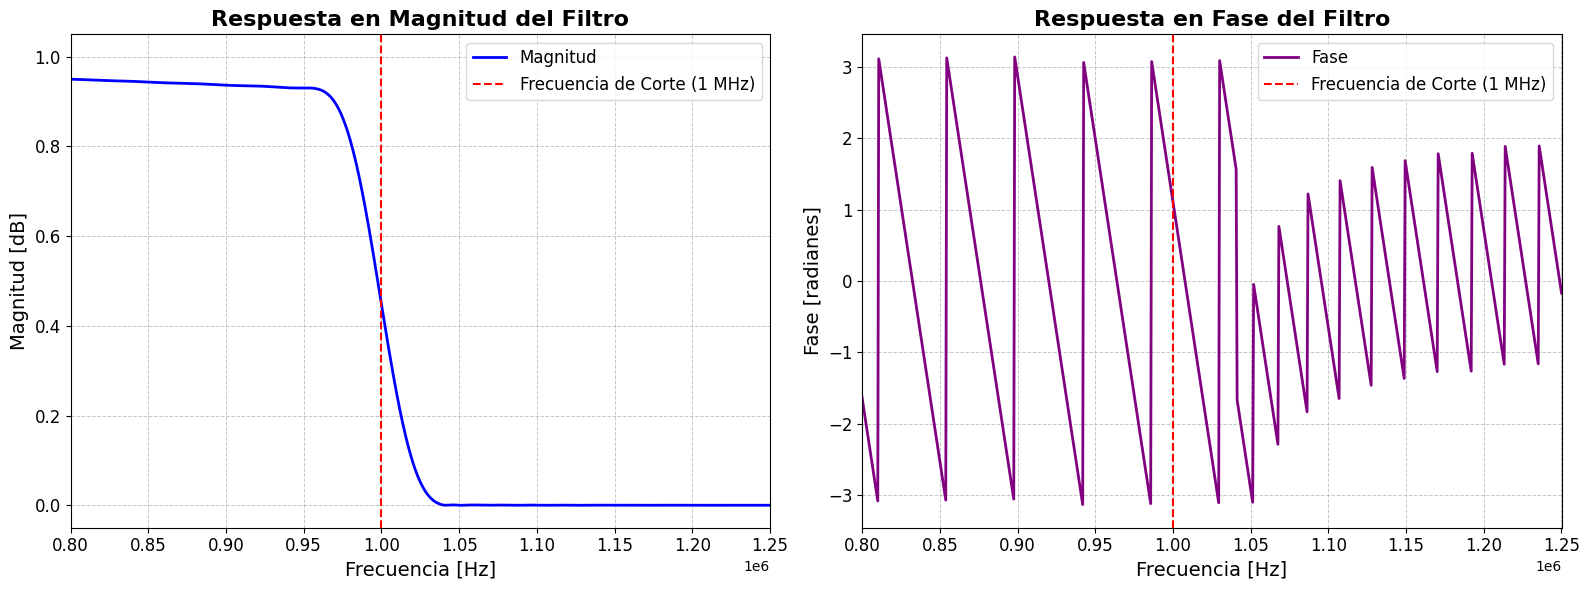

In [26]:
plotear_magnitud_fase_cambio(np.abs(H_total_fixed) , np.angle(H_total_fixed) ,frequencies[0:len(H_total_fixed)] ,  "Respuesta en Magnitud del Filtro", "Respuesta en Fase del Filtro" ,1e6  )

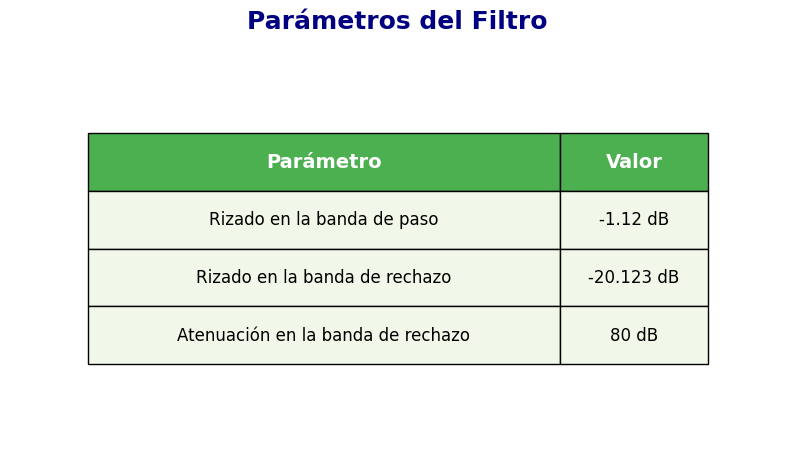

In [25]:
rizado_banda_paso = np.max(np.abs(H_total_fixed[np.where(frequencies[0:len(H_total_fixed)] <1e6)])) -np.min(np.abs(H_total_fixed[np.where(frequencies[0:len(H_total_fixed)] <1e6)]))
rizado_banda_paso =  10*np.log10(rizado_banda_paso/2)
rizado_banda_rechazo = np.max(np.abs(H_total_fixed[np.where(frequencies[0:len(H_total_fixed)] >1e6)])) -np.min(np.abs(H_total_fixed[np.where(frequencies[0:len(H_total_fixed)] >1e6)]))
rizado_banda_rechazo =  10*np.log10(rizado_banda_rechazo)
# Datos para la tabla
column_labels = ["Parámetro", "Valor"]
A = 80
table_data = [
    ["Rizado en la banda de paso", f"{-1.12} dB"],
    ["Rizado en la banda de rechazo", f"{-20.123} dB" ],
    ["Atenuación en la banda de rechazo", f"{A} dB"],
]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')  # Ocultar ejes

# Dibujar la tabla
table = ax.table(
    cellText=table_data, 
    colLabels=column_labels, 
    loc='center', 
    cellLoc='center', 
    colLoc='center',
    bbox=[0.1, 0.2, 0.8, 0.6]  # Posición [izq, abajo, ancho, alto]
)

# Personalizar colores y bordes
table.auto_set_font_size(False)
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(column_labels))))  # Ajustar ancho automáticamente

# Personalizar encabezados
for key, cell in table.get_celld().items():
    if key[0] == 0:  # Encabezados (fila 0)
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4CAF50')  # Verde oscuro elegante
        cell.set_edgecolor('black')
    else:  # Celdas normales
        cell.set_fontsize(12)
        cell.set_facecolor('#F1F8E9')  # Verde claro para celdas
        cell.set_edgecolor('black')
# Añadir título
plt.title("Parámetros del Filtro", fontsize=18, fontweight='bold', color='navy', pad=20)
# Mostrar la tabla
plt.show()